# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15666914445                   -0.60    6.1    277ms
  2   -11.16020701905       -2.45       -1.30    1.1    399ms
  3   -11.16039615158       -3.72       -2.34    2.1    132ms
  4   -11.16041648178       -4.69       -3.23    2.1    143ms
  5   -11.16041703075       -6.26       -3.37    2.4    156ms
  6   -11.16041704331       -7.90       -3.50    1.0    109ms
  7   -11.16041704672       -8.47       -3.67    1.0    108ms
  8   -11.16041704988       -8.50       -4.03    1.0    109ms
  9   -11.16041705112       -8.91       -4.53    1.1    110ms
 10   -11.16041705138       -9.58       -5.05    1.7    126ms
 11   -11.16041705144      -10.23       -5.50    2.1    144ms
 12   -11.16041705145      -11.25       -5.78    1.7    132ms
 13   -11.16041705145      -11.95       -6.46    1.7    135ms


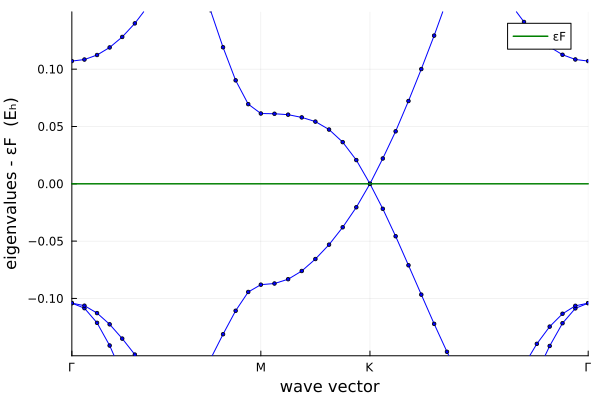

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)